<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Using TensorFlow Keras, Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn.

This is your "Hello World!" of TensorFlow.

### Example TensorFlow Starter Code

```python 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(3, activation='sigmoid', input_dim=2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

results = model.fit(X,y, epochs=100)

```

### Additional Written Tasks:
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
Binary Cross Entropy.Binary_crossentropy, when fed with input resulting from sigmoid activation, will not produce over- or underflow of numbers. It is the loss function to be evaluated first and only changed if you have a good reason.

2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
The loss function is used to optimize your model. This is the function that will get minimized by the optimizer.A metric is used to judge the performance of your model. 

3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 
Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.The Adam optimization algorithm is an extension to stochastic gradient descent. Adam is derived from adaptive moment estimation, meaning that Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
data = {
    'x1': [0, 0, 1, 0, 1, 1, 0],
    'x2': [0, 1, 0, 1, 0, 1, 0],
    'x3': [1, 1, 1, 0, 0, 1, 0],
    'y': [0, 1, 1, 1, 1, 0, 0]
}
df = pd.DataFrame.from_dict(data).astype('int')

In [5]:
X = df[['x1', 'x2', 'x3']].values
y = df['y'].values

In [6]:
print(X.shape, y.shape)

(7, 3) (7,)


### Build a Tensor Keras Perceptron

Try to match the architecture we used on Monday - inputs nodes and one output node. Apply this architecture to the XOR-ish dataset above. 

After fitting your model answer these questions: 

Are you able to achieve the same results as a bigger architecture from the first part of the assignment? Why is this disparity the case? What properties of the XOR dataset would cause this disparity? 


Now extrapolate this behavior on a much larger dataset in terms of features. What kind of architecture decisions could we make to avoid the problems the XOR dataset presents at scale? 

*Note:* The bias term is baked in by default in the Dense layer.

In [7]:
model = Sequential([
    Dense(4, activation='sigmoid', input_dim=3),
    Dense(3, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

results = model.fit(X,y, epochs=2000, verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
import seaborn as sns

In [9]:
results.history.keys()

dict_keys(['loss', 'accuracy'])

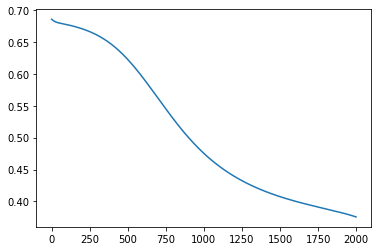

In [10]:
sns.lineplot(range(2000), results.history['loss']);

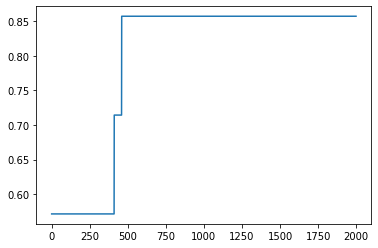

In [11]:
sns.lineplot(range(2000), results.history['accuracy']);

## Try building/training a more complex MLP on a bigger dataset.

Use TensorFlow Keras & the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the canonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the Internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [12]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [13]:
# input image dimensions
img_rows, img_cols = 28, 28

In [14]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [16]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simplify the problem for now: Zero or all else.

In [17]:
import numpy as np

y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [18]:
# A Nice Binary target for ya to work with
y_train

array([0., 1., 0., ..., 0., 0., 0.])

### Estimating Your `net

In [19]:
model = Sequential([
    Dense(6, activation='relu', input_dim=784),
    Dense(1, activation='sigmoid')
])
#so far best model. Tried two sigmoid activations and this gave the best accuracy of 99.59%

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

results = model.fit(x_train,y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0475 - accuracy: 0.9866
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0273 - accuracy: 0.9919
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0245 - accuracy: 0.9929
Epoch 4/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0217 - accuracy: 0.9934
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0183 - accuracy: 0.9944
Epoch 6/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0159 - accuracy: 0.9952
Epoch 7/10
60000/60000 [==============================] - 14s 234us/sample - loss: 0.0138 - accuracy: 0.9958
Epoch 8/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0117 - accuracy: 0.9964
Epoch 9/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0106 - accuracy: 0.9968
Epoch 10

In [22]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0139 - accuracy: 0.9962


[0.013866511626366991, 0.9962]

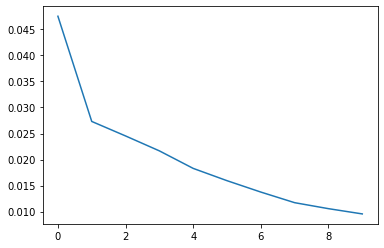

In [24]:
sns.lineplot(range(10), results.history['loss']);

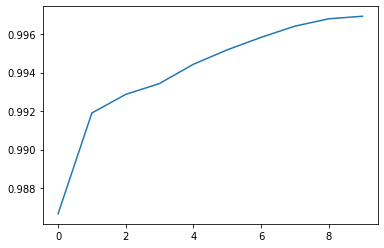

In [25]:
sns.lineplot(range(10), results.history['accuracy']);

## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?